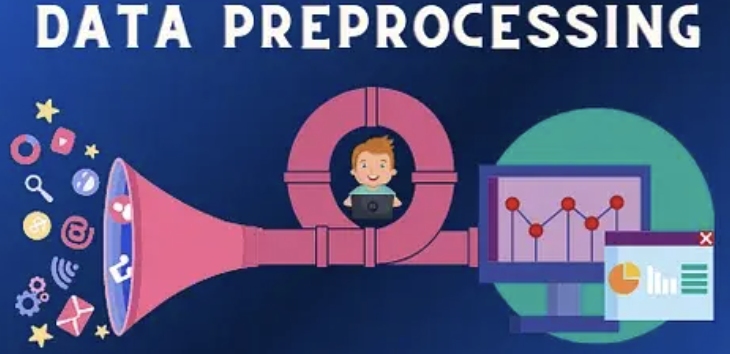

# **Section 1: Data Processing: Arthritis Profile**

**Case study :** Arthritis is a chronic condition that affects millions globally, with severity levels ranging from mild to severe. Accurate classification of arthritis severity is critical for optimizing patient outcomes, as treatment plans can vary significantly based on the disease's progression. A healthcare provider wants to classify arthritis patients into different severity levels (e.g., mild, moderate, severe) based on their clinical, biochemical, and lifestyle data. By accurately predicting severity, the provider can recommend tailored treatments such as physical therapy, medications, or surgical interventions. For doing such analysis, we need to do following steps:

# **Step 1: Data Acquisition_ADP**

**Question1_ADP**:Using Python coding, read the file. Show the number of the samples, features, and what type of values each feature consist of(Discrete or Continous)?

In [ ]:
# Import Libraries and required functions

# Core data manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistics and hypothesis testing
from scipy import stats
from scipy.stats import zscore, ttest_ind

# Machine learning preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

# Handling class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


I aggregated all the import here for better readability and ease of use to understand what all libraries went behind the analysis and avoid redundancy.

In [ ]:
# Loading the Arthritis Profile Data CSV
path = '/content/APDDataset.xlsx'
df = pd.read_excel(path)

# Dropping the unwanted index column
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

# Showing the number of samples and features
num_samples = df.shape[0]
num_features = df.shape[1]

print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}\n")

# Showing the datatypes of all features
print("Data Types of Each Feature:")
print(df.dtypes)

# Helper function to classify features as discrete or continuous
def classify_feature_type(series):
    unique_values = series.nunique()
    if pd.api.types.is_numeric_dtype(series):
        if unique_values <= 2:
            return 'Discrete'
        else:
            return 'Continuous'
    else:
        return 'Categorical'

# Classifying each column as
feature_types = pd.DataFrame({
    'Feature': df.columns,
    'Type': [classify_feature_type(df[col]) for col in df.columns]
})

print("\nFeature Type Classification (Discrete vs Continuous):")
print(feature_types)


Number of samples: 102
Number of features: 25

Data Types of Each Feature:
Gender_M        int64
Age           float64
TC            float64
P             float64
L             float64
E             float64
ESRh          float64
ESRo          float64
Hb            float64
RBC           float64
Abs           float64
PC            float64
PCV           float64
MCV           float64
MCH           float64
MCHC          float64
ASO           float64
RA            float64
CRP           float64
RBS           float64
Urea          float64
Creatinine    float64
Calcium       float64
Uric_Acid     float64
Label           int64
dtype: object

Feature Type Classification (Discrete vs Continuous):
       Feature        Type
0     Gender_M    Discrete
1          Age  Continuous
2           TC  Continuous
3            P  Continuous
4            L  Continuous
5            E  Continuous
6         ESRh  Continuous
7         ESRo  Continuous
8           Hb  Continuous
9          RBC  Continuous
10       

As seen in the dataset, I have tightly checked for discrete and continous values and found Gender and Label to be the discrete values and all other as continuous values, I have checked for unique values to be less than or equal to 2 to qualify as discrete.



**Note on Encoding:**  
* Encoding techniques such as one-hot or label encoding are commonly applied when categorical variables are present. Hence, it was not used here.


# **Step 2: Data Pre-Processing**

**Question 2_ADP:**

*2.1 Data Cleaning*: Detect if the data consist of any missing values or duplicate? what do you recommend? Develop it.

Also, using Box Plots, show if the data consist of any outliers?Analyze your results and discuss it briefly. And, provide a statistical description of your data for each feature, including mean, std, min, max, 25%, 50%, and 75%

Using Z-score, do you find any outliers?

Also, are we dealing with noisy data? Please elaborate your response. In case of yes, what do you recommend? Develop it.

[All have to be done by coding in python].

# Checking and removing Missing and Duplicate values

In [ ]:
df_cleaned = df.copy()

# Checking for missing values
print("Missing Values per Column:")
print(df.isnull().sum())

# Checking for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())

for col in df_cleaned.columns:
   # only handling columns with missing values
    if df_cleaned[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df_cleaned[col]):
            # Checking skewness to decide between mean/median
            if abs(df_cleaned[col].skew()) > 1:
                df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
            else:
                df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())
        else:
            # For categorical/discrete columns
            df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Reporting shape after imputation and duplicate removal
df_cleaned = df_cleaned.drop_duplicates()
print("\nShape after imputation and duplicate removal:", df_cleaned.shape)

# Checking Missing Values again to verify the method
print("\nMissing values per column (df_cleaned):")
print(df_cleaned.isnull().sum())

Missing Values per Column:
Gender_M       0
Age           32
TC             4
P              3
L              3
E              3
ESRh           8
ESRo           8
Hb             4
RBC           73
Abs           24
PC            75
PCV           73
MCV           73
MCH           73
MCHC          74
ASO            7
RA             4
CRP           55
RBS           23
Urea          53
Creatinine    42
Calcium       91
Uric_Acid     25
Label          0
dtype: int64

Number of Duplicate Rows:
0

Shape after imputation and duplicate removal: (102, 25)

Missing values per column (df_cleaned):
Gender_M      0
Age           0
TC            0
P             0
L             0
E             0
ESRh          0
ESRo          0
Hb            0
RBC           0
Abs           0
PC            0
PCV           0
MCV           0
MCH           0
MCHC          0
ASO           0
RA            0
CRP           0
RBS           0
Urea          0
Creatinine    0
Calcium       0
Uric_Acid     0
Label         0
dtype: i

Here I have checked for Missing and Duplicate Values and performed imputation on them base on the feature type. For example,


*   For Numeric (Symmetric) - Mean Imputation
*   For Numeric (Skewed) - Median Imputation
*   For Categorical or Discrete - Mode/Most Frequent Imputation

this way different features are handled differently to give more accurate results in the further steps.

I have also made sure to chek for missing values after performing the methods to cross check if my method works.

# Description of cleaned data

In [ ]:
# Statistical description
print("\nDescriptive Statistics:")
print(df_cleaned.describe())


Descriptive Statistics:
         Gender_M         Age            TC           P           L  \
count  102.000000  102.000000    102.000000  102.000000  102.000000   
mean     0.333333   50.900000   8846.078431   58.949495   34.333333   
std      0.473732   10.034742   1887.933103    7.761767    7.302516   
min      0.000000   16.000000   3900.000000   38.000000   14.000000   
25%      0.000000   47.000000   7850.000000   54.000000   29.250000   
50%      0.000000   50.900000   8900.000000   59.000000   34.333333   
75%      1.000000   55.000000   9675.000000   64.000000   39.000000   
max      1.000000   73.000000  20900.000000   82.000000   53.000000   

                E        ESRh        ESRo          Hb         RBC  ...  \
count  102.000000  102.000000  102.000000  102.000000  102.000000  ...   
mean     6.767677   18.362745   33.480392   10.453061    4.119608  ...   
std      1.681750   11.716781   20.570926    1.362962    0.540817  ...   
min      4.000000    8.000000   15.0000

**Description:**
* The dataset consists of 102 patient records across 25 features (after removing the redundant Unnamed index column). The descriptive statistics summarize the data distribution, highlighting how central tendency (mean, median), dispersion (standard deviation, range), and frequency counts provide insight into each feature.
* For example, the mean of 0.33 in Gender indicates that approximately 33% of the patients are male, while the remaining 67% are female. The standard deviation of 0.47 reflects the binary spread, and the min/max values of 0 and 1 confirm correct encoding of the categorical variable. The count of 102 confirms no missing values for this column.
* Similarly, for continuous features such as Age, Hb, Creatinine, and RBC, the statistics highlight typical ranges, outliers, and biological variations. A mean creatinine value of ~1.0 mg/dL, for example, falls within the normal clinical range but a maximum of 6.1 mg/dL suggests possible renal impairment cases.(as per my personal intuitions and research on the topic)
* This structured description not only clarifies the nature of each variable but also provides a foundation for data cleaning, outlier handling, and feature scaling, which are essential steps in preparing the dataset for downstream machine learning tasks.

# Box Plot

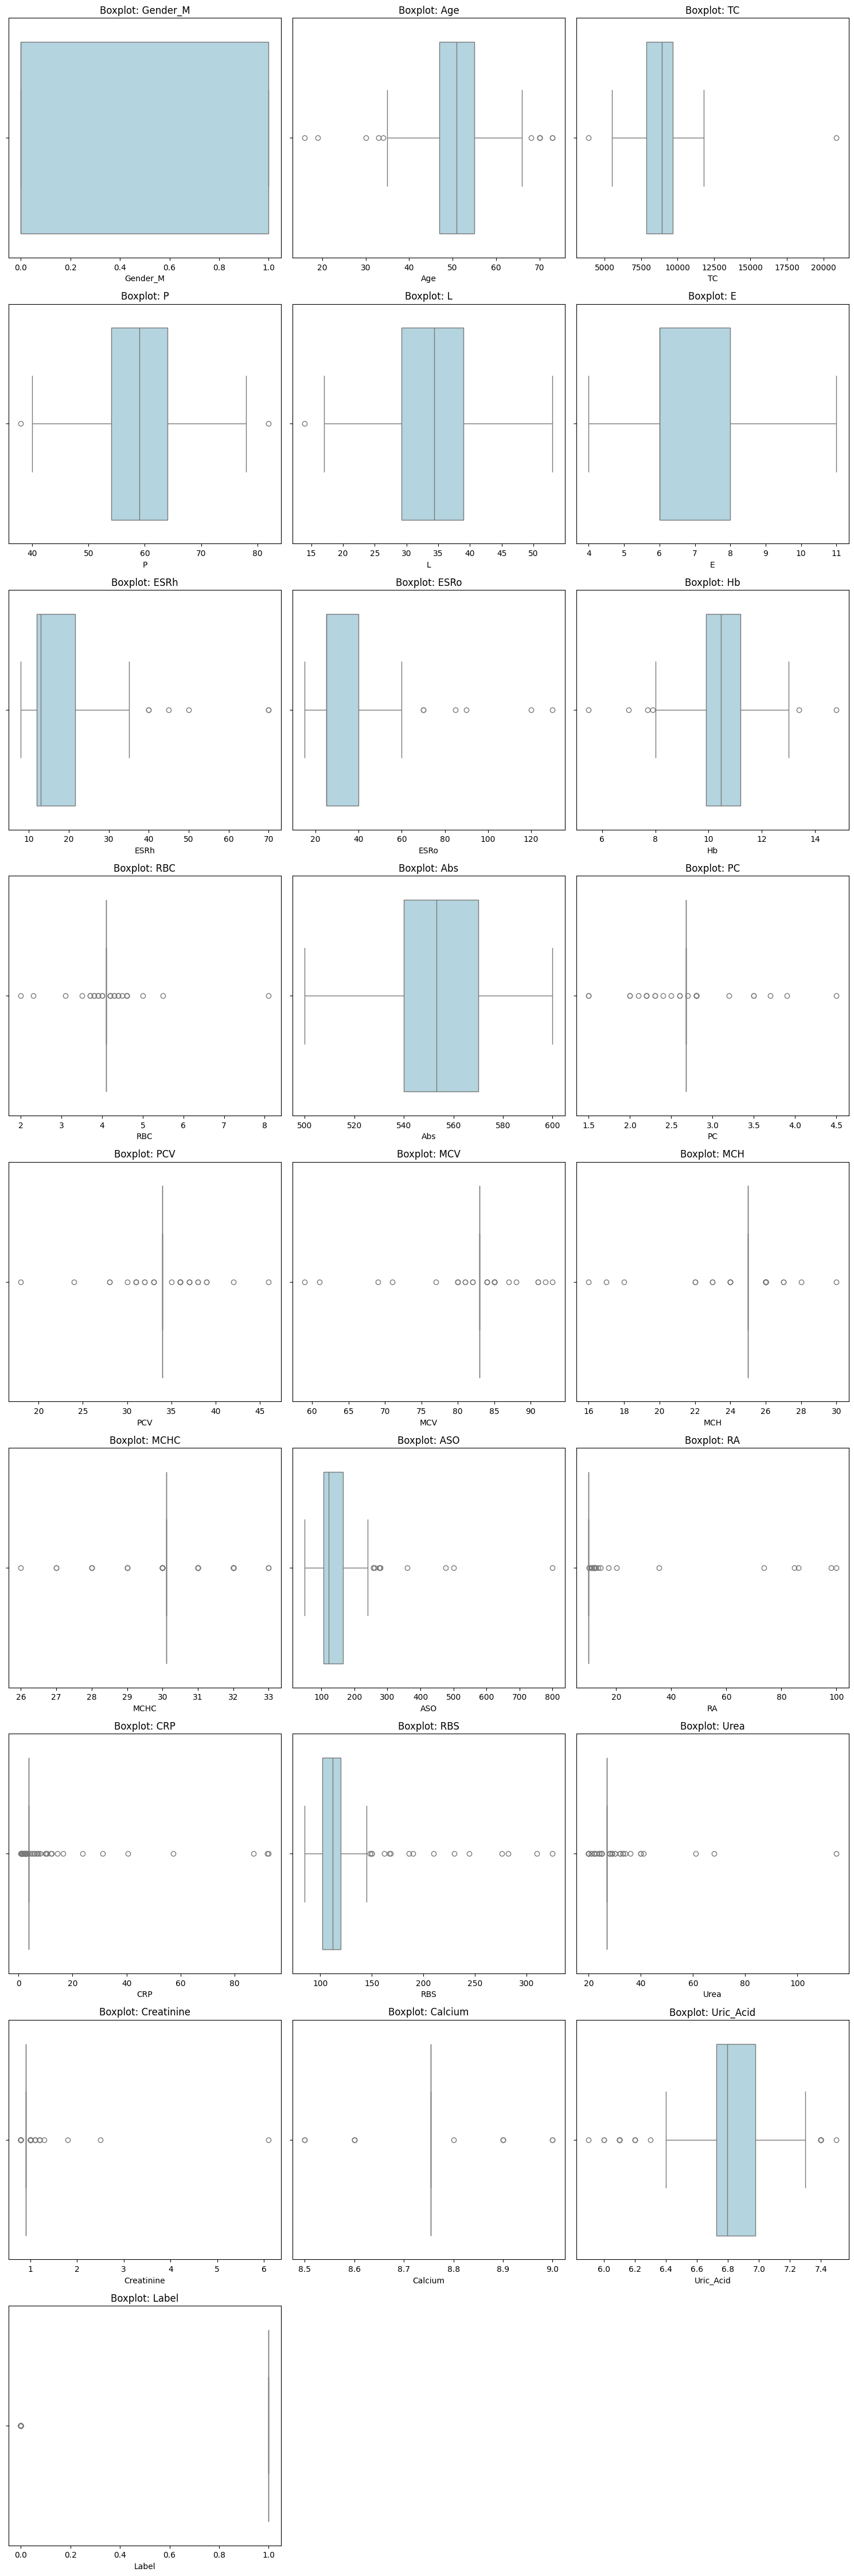

In [ ]:
# Plotting Box Plot of the Features
numeric_columns = df_cleaned.select_dtypes(include='number').columns

plt.figure(figsize=(15, 5 * ((len(numeric_columns) + 2) // 3)))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.boxplot(x=df_cleaned[col], color='lightblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()
plt.show()

There are two main differeces in the overall box plots:

**Line Like PLot**
* CRP, RA, RBS, ASO, Calcium, Creatinine, PC, PCV, MCV, MCH, MCHC, Label, Gender_M
* This usually occurs when: The 25th, 50th, and 75th percentiles are nearly the same (IQR ≈ 0), or Most values are identical with few exceptions (extreme skew or class imbalance).

**Proper Distribution PLot**
* Age, Hb, RBC, Uric_Acid, Abs, ESRo, ESRh, E, L, P, TC
These boxplots have a visible interquartile range (IQR), indicating that the data is well-distributed and statistically informative. Mild to extreme outliers are visible in TC, ESRo, and Uric_Acid, which could reflect abnormal biological variations in arthritic patients.

In [ ]:
# Defining continuous numerical columns for log transformation
continuous_cols = df_cleaned.select_dtypes(include='number').columns.tolist()

# making a copy of the data
df_log_transformed = df_cleaned.copy()

# Using log1p to handle zero values safely
for col in continuous_cols:
    df_log_transformed[col] = np.log1p(df_log_transformed[col])

print("Log transformation applied using log1p to all continuous numerical features.")
df_log_transformed[continuous_cols].describe()

Log transformation applied using log1p to all continuous numerical features.


,Gender_M,Age,TC,P,L,E,ESRh,ESRo,Hb,RBC,...,MCHC,ASO,RA,CRP,RBS,Urea,Creatinine,Calcium,Uric_Acid,Label
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.231049,3.927114,9.067579,4.085031,3.541353,2.027286,2.839448,3.415847,2.430793,1.628026,...,3.436948,4.912090,2.548457,1.715910,4.788879,3.352476,0.676524,2.277713,2.052218,0.530054
std,0.328366,0.225307,0.201548,0.131920,0.225315,0.213573,0.461908,0.470436,0.125303,0.100592,...,0.031609,0.460289,0.468763,0.757297,0.269622,0.225881,0.151704,0.006354,0.043031,0.295473
min,0.000000,2.833213,8.268988,3.663562,2.708050,1.609438,2.197225,2.772589,1.871802,1.098612,...,3.295837,3.931826,2.397895,0.631272,4.454347,3.044522,0.587787,2.251292,1.931521,0.000000
25%,0.000000,3.871201,8.968336,4.007333,3.409395,1.945910,2.564949,3.258097,2.388763,1.629241,...,3.437437,4.671007,2.397895,1.568616,4.634729,3.332205,0.641854,2.277733,2.044196,0.693147
50%,0.000000,3.949319,9.093919,4.094345,3.564827,1.945910,2.639057,3.258097,2.438257,1.629241,...,3.437437,4.820282,2.397895,1.568616,4.727388,3.332205,0.641854,2.277733,2.053624,0.693147
75%,0.693147,4.025352,9.177394,4.174387,3.688879,2.197225,3.112751,3.713572,2.501436,1.629241,...,3.437437,5.113371,2.397895,1.568616,4.795791,3.332205,0.641854,2.277733,2.076297,0.693147
max,0.693147,4.304065,9.947552,4.418841,3.988984,2.484907,4.262680,4.875197,2.760010,2.208274,...,3.526361,6.685998,4.615121,4.539564,5.786897,4.753590,1.960095,2.302585,2.140066,0.693147


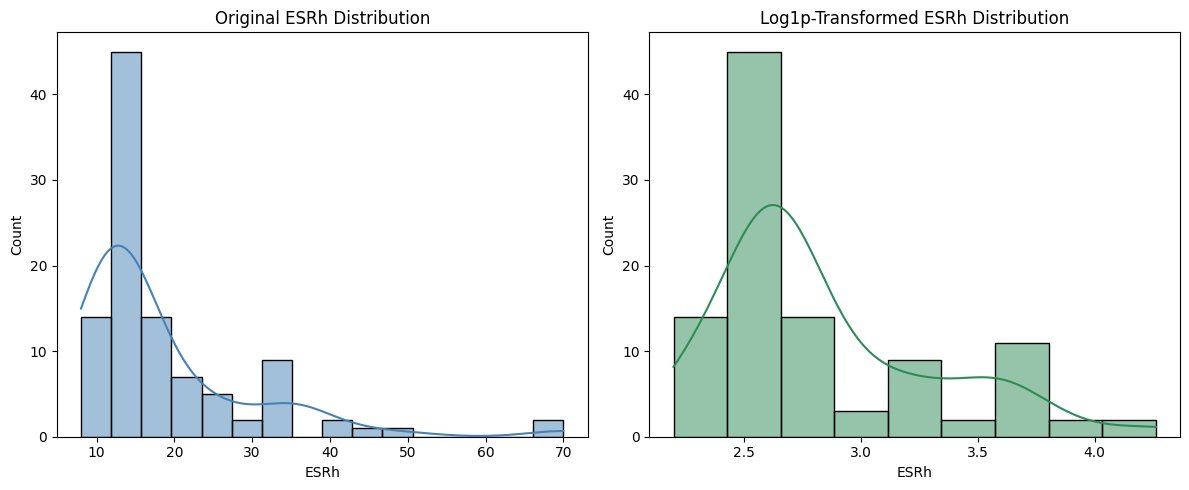

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram before log
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['ESRh'], kde=True, color='steelblue')
plt.title("Original ESRh Distribution")

# Histogram after log
plt.subplot(1, 2, 2)
sns.histplot(df_log_transformed['ESRh'], kde=True, color='seagreen')
plt.title("Log1p-Transformed ESRh Distribution")

plt.tight_layout()
plt.show()


**Note on Log Transformation:**  
In order to stabilize variance and lessen skewness in numerical features, log transformation is frequently used.

However, because extreme values in this dataset remained proportionately distant from the mean, applying log1p to continuous variables did not significantly change the distributions or enhance Z-score outlier detection. For a clearer and easier to understand outlier detection process, I therefore went ahead with standardization and Z-score analysis.

I also used the ESRh example, but as you can see, it didn't yield any noteworthy results.

# Z Score based Outlier Description

In [ ]:
# Identifying continuous numeric columns (exclude binary/discrete)
continuous_cols = []
for col in numeric_columns:
    if df_cleaned[col].nunique() > 2:
        continuous_cols.append(col)

# Applying Z-score only on continuous features
z_scores = np.abs(zscore(df_cleaned[continuous_cols]))
outliers_z = (z_scores > 3).any(axis=1)

print("Continuous columns used for Z-score analysis:")
print(continuous_cols)

print(f"\nNumber of rows flagged as outliers using Z-score (|z| > 3): {outliers_z.sum()}")


Continuous columns used for Z-score analysis:
['Age', 'TC', 'P', 'L', 'E', 'ESRh', 'ESRo', 'Hb', 'RBC', 'Abs', 'PC', 'PCV', 'MCV', 'MCH', 'MCHC', 'ASO', 'RA', 'CRP', 'RBS', 'Urea', 'Creatinine', 'Calcium', 'Uric_Acid']

Number of rows flagged as outliers using Z-score (|z| > 3): 32


In class, Z-score detection was demonstrated on all numeric features. But, here I am applying Z score on only continuous features as it will not be feasible to apply it on discrete features, though it doesn't make a major change on the outcomes of the process, upon personal exploration and understanding I found that though z score can be applied to descrete data it can be porblematic in normalizing the data or may destort outlier datection. Hence relying on coninous data is more feasible for extreme values.

# Standard Deviation Detection

In [ ]:
# Finding features with highest standard deviation (potentially noisy)
print("\nTop 10 features with highest standard deviation:")
print(df_cleaned[numeric_columns].std().sort_values(ascending=False).head(10))


Top 10 features with highest standard deviation:
TC      1887.933103
ASO       98.760959
RBS       45.019396
Abs       26.375344
ESRo      20.570926
RA        17.235748
CRP       16.301745
ESRh      11.716781
Urea      10.793863
Age       10.034742
dtype: float64


Here it is elucidated that the Total Cholestrol(TC) has the highest variability followed by ASO, RBS and others. This signifies that these features have a larger spread of data and may be the fore runners of ambiguity in the data. While Calcium. MCHC and Uric_acid are more stable and less prone to ambiguity. Identifying such deviations helps in gauging the data spread and allows for efficient framing of data transformation accordingly. Identifying high-variance features is critical for targeted preprocessing, as it highlights the need for transformations (e.g., log scaling, robust normalization) on highly variable features, while more stable variables may require minimal adjustment.

**Question 3_ADP:**

*2.2 Data Transformation*: we want to normalize the data to improve the quality and remove the redundancy of the corresponding data. what do you recommend? develop it.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Label is non Binary
df_standardized = df_cleaned.copy()
features_only = df_cleaned.drop(columns=['Label'])
scaler = StandardScaler()
df_standardized[features_only.columns] = scaler.fit_transform(features_only)

# Keeping original label untouched
df_standardized['Label'] = df_cleaned['Label']

# Showing first few rows of the standardized data
print("\nStandardized Data Preview (Z-score):")
print(df_standardized[numeric_columns].head())

# Verifying mean and std dev for each column
print("\nMean of each column after standardization (should be ~0):")
print(df_standardized[numeric_columns].mean())

print("\nStandard deviation of each column after standardization (should be ~1):")
print(df_standardized[numeric_columns].std())


Standardized Data Preview (Z-score):
   Gender_M       Age        TC         P         L         E      ESRh  \
0 -0.707107  0.000000  0.507768 -0.381880  0.779820 -1.653839 -0.202651   
1  1.414214  0.000000  0.880375 -0.640825  0.779820 -0.458729 -0.803035   
2 -0.707107 -0.891299 -0.716511  0.912849 -0.871564 -0.458729  0.311964   
3 -0.707107 -1.792612 -0.929430 -1.417663  1.330282  0.736381 -0.459958   
4 -0.707107  0.000000  0.560998  2.337051 -2.385333 -0.458729  4.428883   

       ESRo        Hb       RBC  ...          MCHC       ASO        RA  \
0 -0.170025  0.255805 -0.036435  ...  1.475008e-14 -0.321416 -0.151588   
1 -0.902811  0.403269  0.149384  ...  1.475008e-14 -0.657206 -0.266450   
2  0.318498 -2.546010 -0.036435  ...  1.475008e-14 -0.016152 -0.266450   
3 -0.414287  0.403269 -0.036435  ...  1.475008e-14 -0.879845 -0.266450   
4  4.715211  0.034609 -0.593891  ... -1.112084e-01 -0.636855 -0.266450   

        CRP       RBS      Urea  Creatinine   Calcium     Uric_Aci

* The Inferences for Standard Scaler reflect that it successfully transformed all numeric features (in our case all the features), we are now at a standard deviation ~1.
* Standardization in case as such help in giving each feature a fair chance and stabilizes optimization.

# Histogram

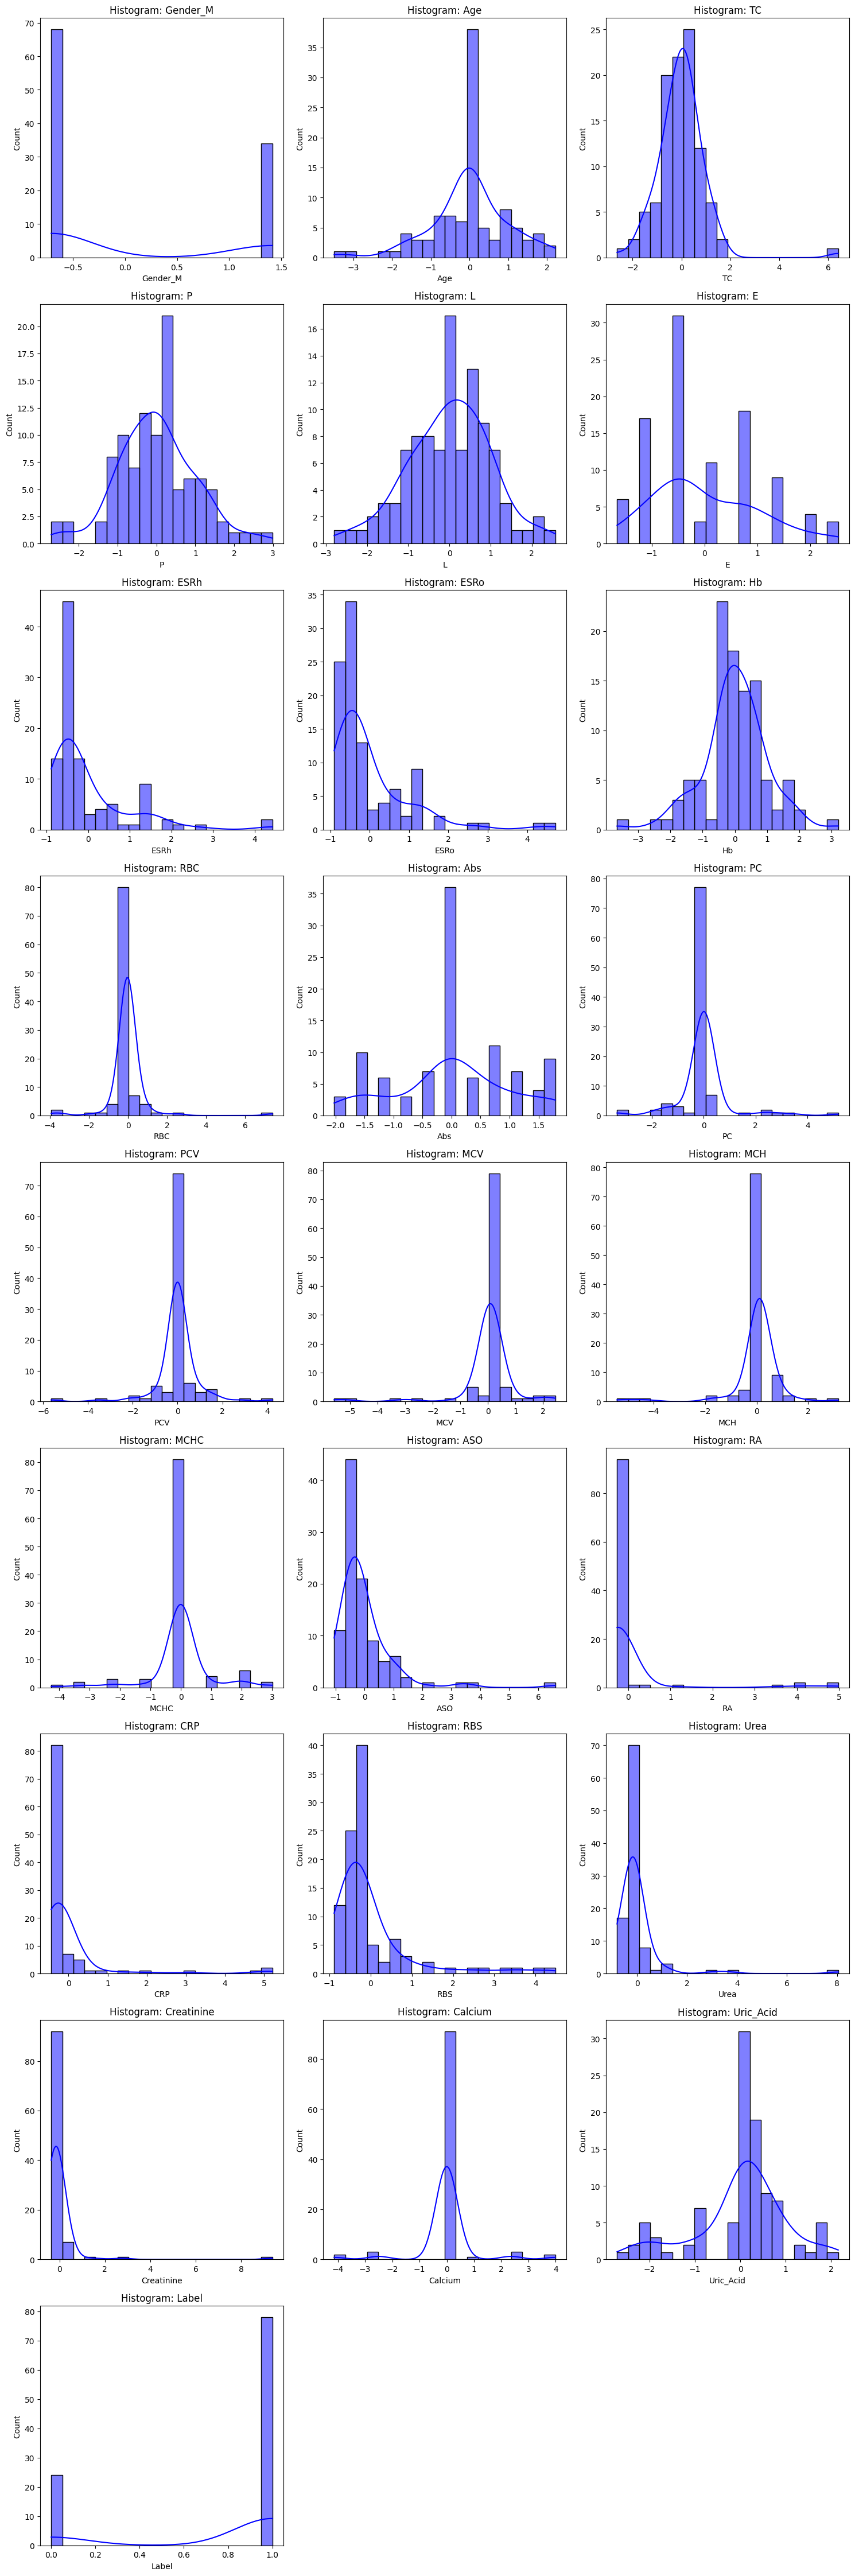

In [ ]:
plt.figure(figsize=(15, 5 * ((len(numeric_columns) + 2) // 3)))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot((len(numeric_columns) + 2) // 3, 3, i)
    sns.histplot(df_standardized[col], kde=True, bins=20, color='blue')
    plt.title(f'Histogram: {col}')
    plt.tight_layout()
plt.show()

The Histogram was plotted here in order to validate the effects of z score standardization.

The major elucidation from this are:-
*   They prove that the standard deviation is close to 1 by keeping the range between -3 and +3. And that all the features have been rescaled near 1.
* Some variables do seem tightly clustered elaborating that they have low variance.


**Question 4_ADP:**

*2.3 Imbalanced*: Can you specify the number of the samples in each class, and if it is imabalnced? can you visualize your majority and minority classes? Can you develop one undersampling and one oversampling techniques and explain about them.

# Counting Class

In [ ]:
# Counting the samples in each class
class_counts = df_cleaned['Label'].value_counts()
print("Class Distribution:")
print(class_counts)

# Checking imbalance ratio by dividing both the classes
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"\nImbalance Ratio (Minority / Majority): {imbalance_ratio:.2f}")

Class Distribution:
Label
1    78
0    24
Name: count, dtype: int64

Imbalance Ratio (Minority / Majority): 0.31


this code counts number of values under each Label 0 and 1, which is then used to calculate imbalance ratio.

# Visualizing Class Distribution

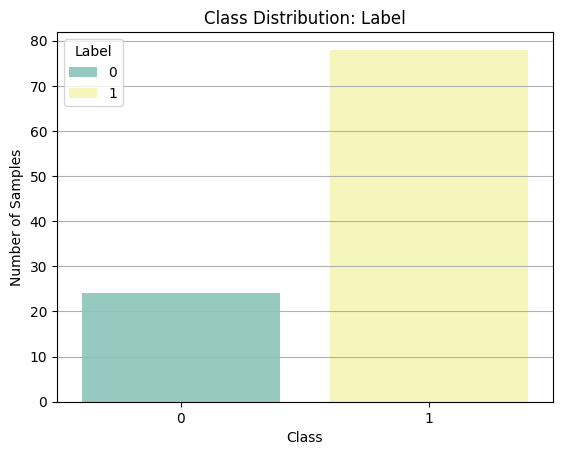

In [ ]:
# Bar Plot of Imbalance
sns.countplot(x='Label', data=df_cleaned, hue='Label', palette='Set3', legend=True)
plt.title("Class Distribution: Label")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()


# Imbalance Handling Using: Random Undersampling Technique and Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
print("Data types in X:")
print(X.dtypes.value_counts())

print("\nLabel value counts:")
print(df_standardized['Label'].value_counts())

Data types in X:
float64    24
Name: count, dtype: int64

Label value counts:
Label
1    78
0    24
Name: count, dtype: int64


In [ ]:
# Use cleaned and standardized data
# using Features only
X = df_standardized.drop(columns=['Label'])
# Targeting Label
y = df_standardized['Label']

# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

print("Undersampled Class Distribution:")
print(pd.Series(y_under).value_counts())

# Synthetic Oversampling
smote = SMOTE(random_state=42)
X_over, y_over = smote.fit_resample(X, y)

print("\nOversampled Class Distribution:")
print(pd.Series(y_over).value_counts())


Undersampled Class Distribution:
Label
0    24
1    24
Name: count, dtype: int64

Oversampled Class Distribution:
Label
0    78
1    78
Name: count, dtype: int64


I have used Random Undersampling and Synthetic Oversampling here

*   **Random Undersampling:** here I ramdomly selected 24 samples from Class 1 and all the samples in 0 to match the dataset size to 24.
*   **Synthetic Oversampling:** Here I selected K nearest Neighbors for each minority class in my case k=5, and then create synthetic sample between original sample and the neighbor, in the same line.

These both methods were chosen for ease of use and they prevent major data loss while keeping the samples relevant.



# Visual Balanced Representation of our Classes

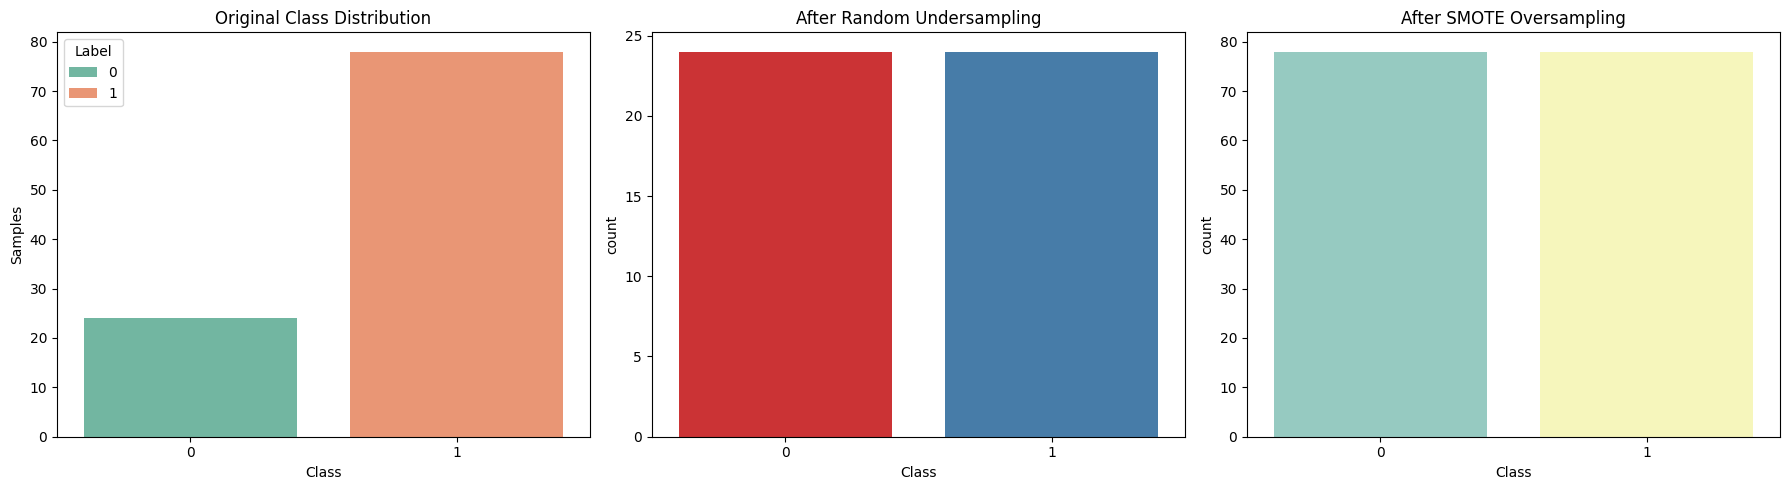

In [ ]:
# Plot: Before, After Undersampling, After Oversampling
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original
sns.countplot(x=y, hue=y, palette='Set2', legend=True, ax=axes[0])
axes[0].set_title('Original Class Distribution')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Samples')

# Undersampled
sns.countplot(x=y_under, hue=y_under, palette='Set1', legend=False, ax=axes[1])
axes[1].set_title('After Random Undersampling')
axes[1].set_xlabel('Class')

# Oversampled
sns.countplot(x=y_over, hue=y_over, palette='Set3', legend=False, ax=axes[2])
axes[2].set_title('After SMOTE Oversampling')
axes[2].set_xlabel('Class')

plt.tight_layout()
plt.show()

# **Step 3:Exploratory Data Analysis**

Exploratory Data Analysis (EDA) involves analyzing and summarizing the key characteristics of the dataset to uncover patterns, detect anomalies, and gain insights that inform subsequent modeling. For the Arthritis Profile Dataset, EDA is crucial to understand the relationships among clinical, biochemical, and lifestyle factors and their influence on arthritis severity.

**Question 5_ADP:**
What is the distribution of key biomarkers like CRP, ESRh and ESRo, and RF?

Is there a relationship between Age and Calcium?

Is there a significant relationship between gender and Red Blood Count?

Can you analyze your results? and what can you learn from these results?

[Note: you need to use visulization tools for discussing the relationships]

CRP, ESRh and ESRo, and RF

# Histogram and Boxplot

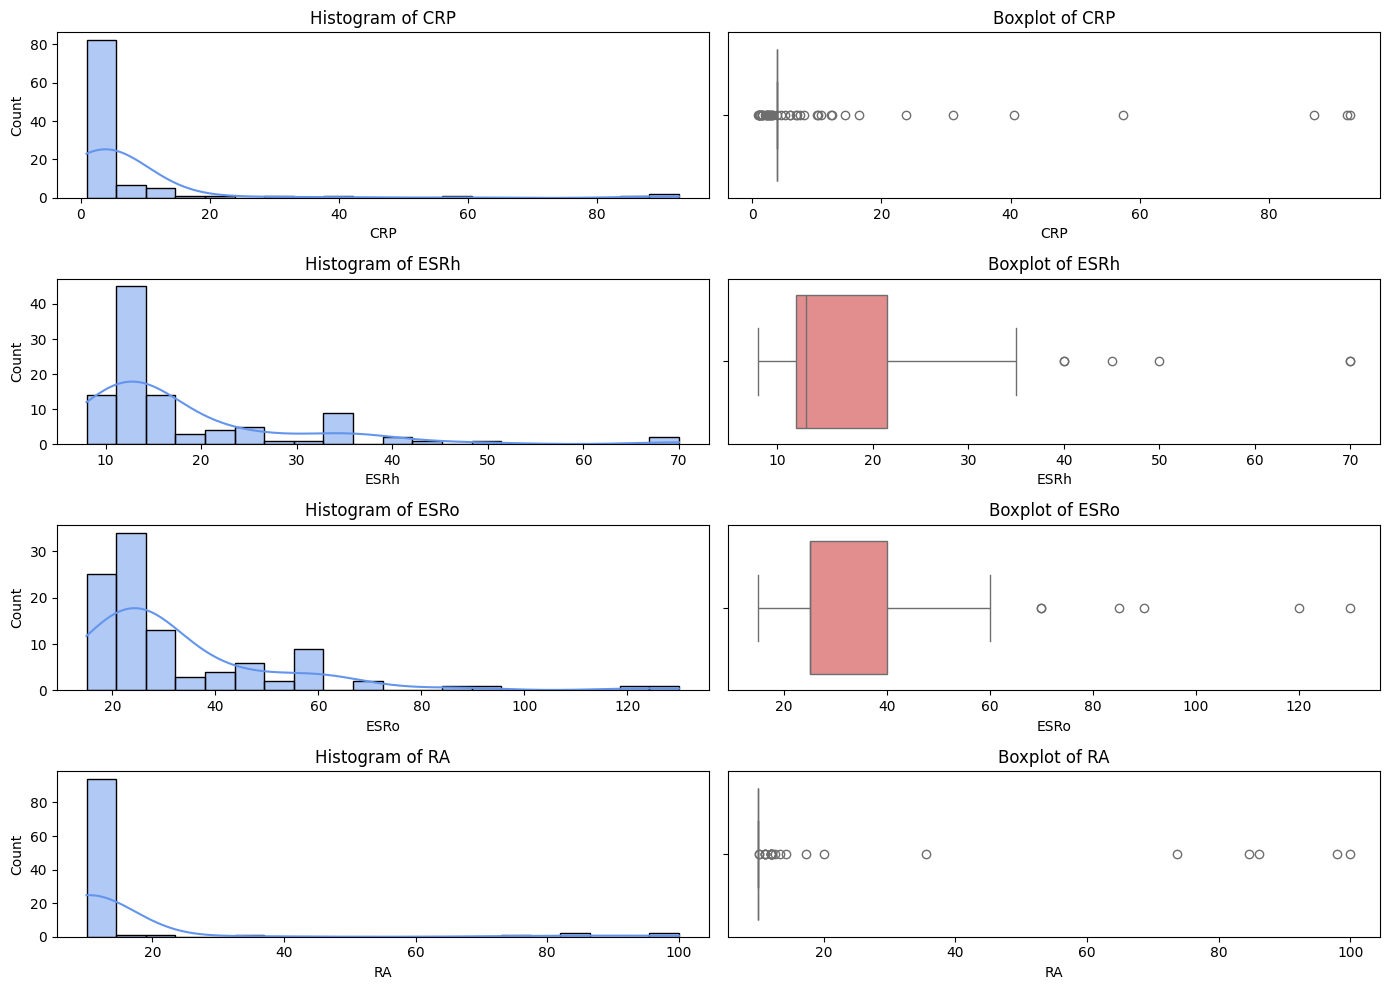

In [ ]:
# Features to analyse
features = ['CRP', 'ESRh', 'ESRo', 'RA']

# Plot histograms and boxplots
plt.figure(figsize=(14, 10))
for i, col in enumerate(features, 1):
    plt.subplot(4, 2, 2 * i - 1)
    sns.histplot(df_cleaned[col], bins=20, kde=True, color='cornflowerblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)

    plt.subplot(4, 2, 2 * i)
    sns.boxplot(x=df_cleaned[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

Here is the visualization of the complete features using Histogram and Boxplot.

The plots show that there is high skew towards right and that the values are clusterd closer to 0, showing that the there is increment in the levels.





# Pairplot

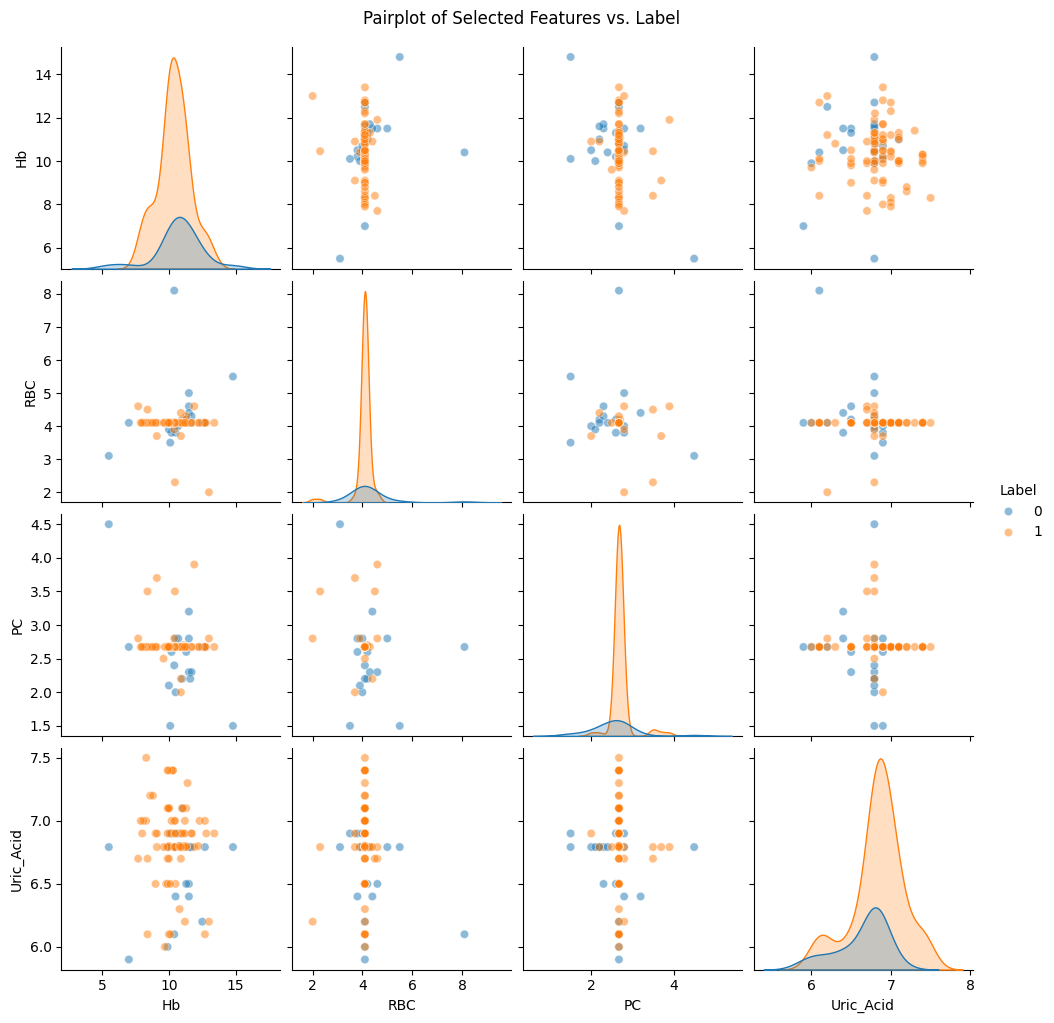

In [ ]:
# Choosing a subset of important features for clarity
pairplot_features = ['Hb', 'RBC', 'PC', 'Uric_Acid', 'Label']

# Pair plot with Label as hue (class separation)
sns.pairplot(df_cleaned[pairplot_features], hue='Label', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Selected Features vs. Label', y=1.02)
plt.show()

The pair plot clearly shows that Hemoglobin and Uric Acid might be moderately useful for distinguishing between classes but the RBC and PC are less effective. The spikes in the curves signify these inferences.

# Age vs Calcium

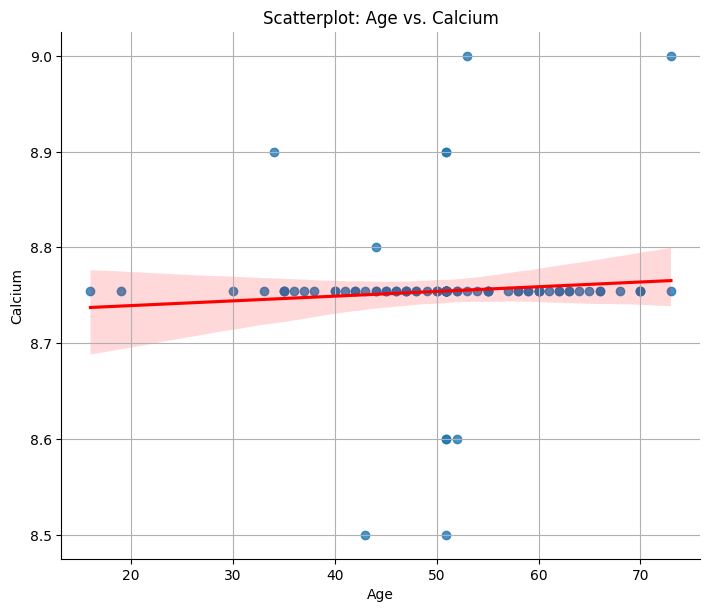

Correlation between Age and Calcium: 0.080


In [ ]:
# Scatterplot with regression line
sns.lmplot(x='Age', y='Calcium', data=df_cleaned, height=6, aspect=1.2, line_kws={'color': 'red'})
plt.title("Scatterplot: Age vs. Calcium")
plt.xlabel("Age")
plt.ylabel("Calcium")
plt.grid(True)
plt.show()

# Pearson correlation
correlation = df_cleaned[['Age', 'Calcium']].corr().iloc[0,1]
print(f"Correlation between Age and Calcium: {correlation:.3f}")

Age and Calcium apper to be constant and there is not a major variation in the calcium as per the dataset. Showing minmal to no correlations.

the correlation coefficient is at 0.080 which also confirms minimal linaer correlation between the two.

# Gender vs RBC

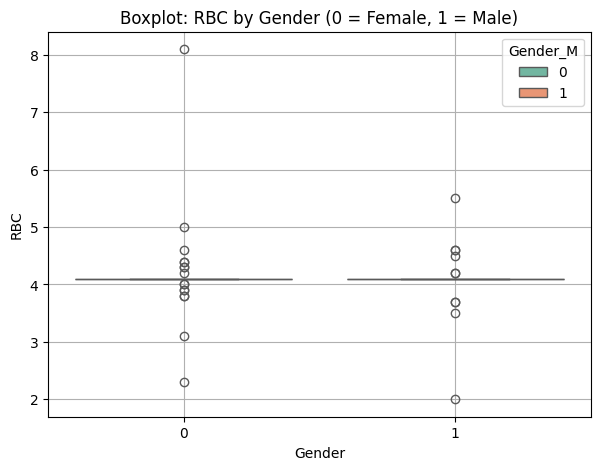

T-statistic: -0.477
P-value: 0.6349


In [ ]:
# Box plots with T Statistics
plt.figure(figsize=(7, 5))
sns.boxplot(x='Gender_M', y='RBC', hue='Gender_M', data=df_cleaned, palette='Set2')
plt.title("Boxplot: RBC by Gender (0 = Female, 1 = Male)")
plt.xlabel("Gender")
plt.ylabel("RBC")
plt.grid(True)
plt.show()

# T-test
rbc_male = df_cleaned[df_cleaned['Gender_M'] == 1]['RBC']
rbc_female = df_cleaned[df_cleaned['Gender_M'] == 0]['RBC']

t_stat, p_value = ttest_ind(rbc_male, rbc_female, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

Here the independent T-test evaluates whether the mean RBC is variable with Genders. While the Boxplot visualizes the RBC with gender values.

*   **Box Plot** - the lines appear visually narrow and flat, indicating very low variance in RBC values.
* **T Statistics** - The ngative value signifies that there is slightly lower RBC in males than females, but the value is very low hence it cannot be considered a significant insight as the value is less than half.
* **P value** - Just as the Box plot and the T Statistics it suggest that there is no major difference in mean RBC values.



# **Step 4: Feature Engineering**
**Question 6_ADP**


**Part 4.1**: Using a Correlation technique, can you detect the correlated features by using heatmap? For finding sets of correlated features, you need to use a threshold.This Threshold is defined by developer. Here, consider the threshold 0.5. Generally, the correlation threshold will be over 0.9.

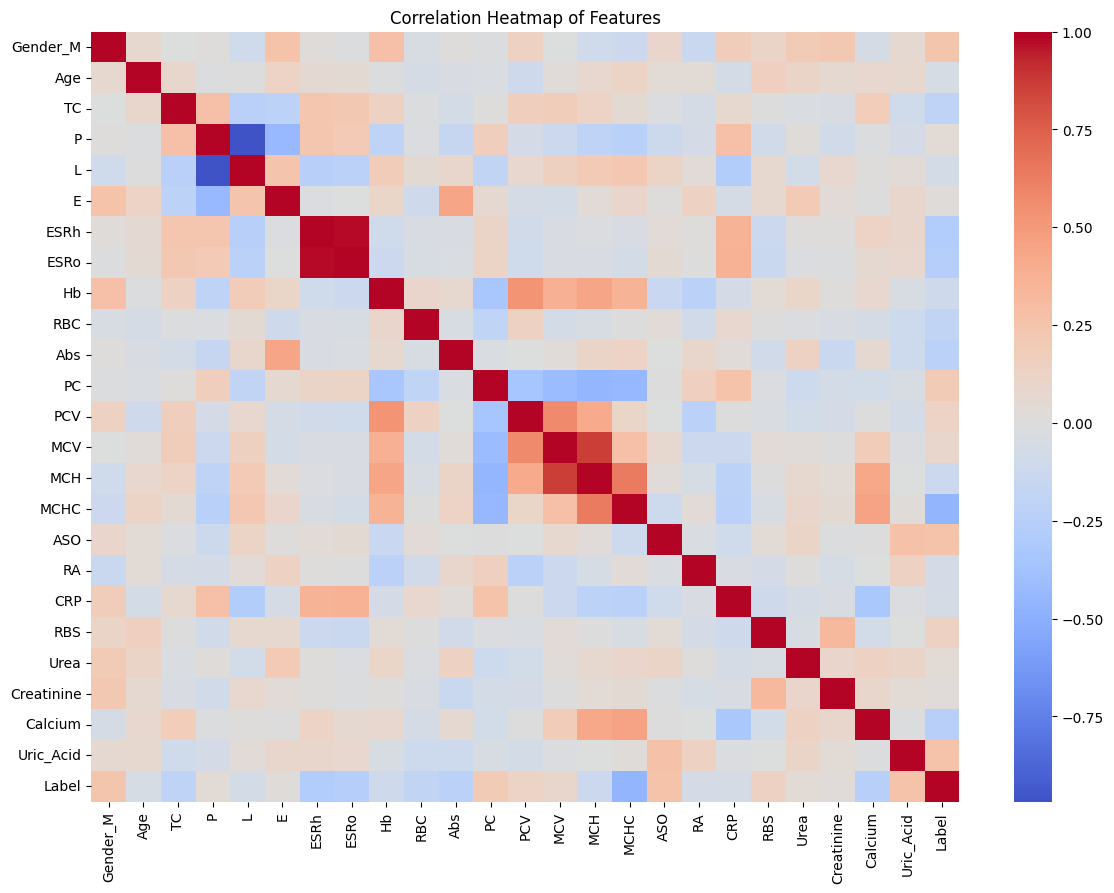

Features correlated above threshold of 0.5:
{'L', 'MCH', 'ESRo', 'MCHC', 'MCV', 'PCV'}


In [ ]:
# Computing correlation matrix using standardized data
corr_matrix = df_standardized.corr()

# Plotting correlation heatmap
plt.figure(figsize=(14, 10))
# Adding Annotes make the readability hindered hence, I have kept it commented.
# sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

# Identifying correlated feature pairs above threshold 0.5
threshold = 0.5
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)

print("Features correlated above threshold of 0.5:")
print(correlated_features)

The Heatmap shows a larger picture of the correlations between features on a threshold of 0.5. The different heat scale reaading signify the intensity of the correlation between the features where there are certain observations.

Observations:-
*   Certain features such as ESRh and ESRo along with PCV, MCV, MCH and MCHC show strong correlation according to the heat readings. These could be because os the similar information they carry.
* Aside from these most of the features show low correlations to each other, which also signifies that they are not duplicating information.
* While there are certain clear correlations between some features they stil are unable to separate classes.

The Heatmap did open up some clearer insights on the data, but it also explains that the classigication of classes in this case may not be as straightforward.



**Part 4.2**: Using Mutual information, idenity important features. visualize the score of each feature.

To summary, we need to remove correlated features from the corresponding data. Removing highly correlated features is a crucial preprocessing step in machine learning to improve model performance, interpretability, generalization, and computational efficiency. It helps create more robust and efficient models that are better suited for real-world applications.

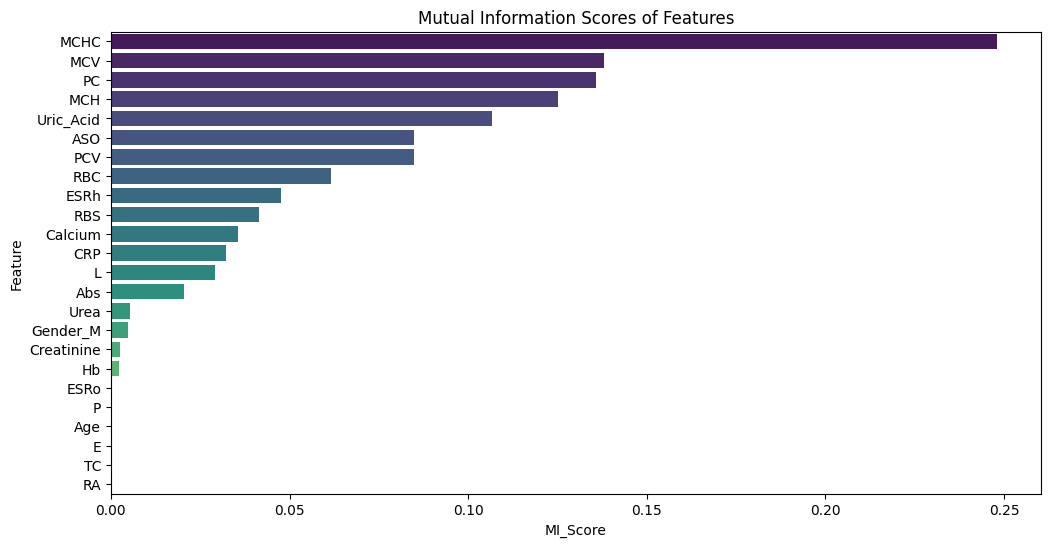


Top Features by MI Score:
      Feature  MI_Score
15       MCHC  0.247935
13        MCV  0.137995
11         PC  0.135818
14        MCH  0.125131
23  Uric_Acid  0.106720
16        ASO  0.084713
12        PCV  0.084711
9         RBC  0.061475
6        ESRh  0.047574
19        RBS  0.041559


In [ ]:
# Defininh features and target
X = df_standardized.drop(columns=['Label'])
y = df_standardized['Label']

# Computinh Mutual Information scores
mi_scores = mutual_info_classif(X, y, random_state=42)

# Creating DataFrame of MI results
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)

# Plot MI scores
plt.figure(figsize=(12, 6))
sns.barplot(x='MI_Score', y='Feature', hue='Feature', data=mi_df, palette="viridis")
plt.title("Mutual Information Scores of Features")
plt.show()

print("\nTop Features by MI Score:")
print(mi_df.head(10))

**Mutual Information Inference**

This measures both linear and non linear dependencies. This very useful in case when linear relationships cannot be established using Correlation. The key observations from this implementation are as follows:-

*   Leading features in the MI score feature are MCHC, MCV, PC, MCH which show the highest MI scores showing.
* Features like Uric_acid didn't get as much traction in correlation but with MI it shows how important it is to take non linear dependencies into cosideration.
* Some features like RA showed a weak correlation with the label earlier but have almost no mutual information here, suggesting that even that weak relationship may not be helpful for prediction.

Mutual Information has helped uncover sutle dependencies that may not have been clear with just the use of correlations.

**Part 4.3:** To remove correlated features, what do you recommend, conisdering Part 4.1 and Part 4.2?


Present the list of remaining features what you achieved in **Section 4.3**.

In [ ]:
# Filtering correlated_features to include only columns present in X
correlated_features_in_X = [col for col in correlated_features if col in X.columns]

# Dropping correlated features (based on 0.5 threshold from 4.1)
X_uncorrelated = X.drop(columns=correlated_features_in_X)

# Selecting top MI features
top_features = mi_df[mi_df['MI_Score'] > 0]['Feature'].tolist()

# Intersection = informative + not correlated
final_features = [f for f in X_uncorrelated.columns if f in top_features]

print("\nFinal Feature Set after Removing Correlated and Low-MI Features:")
print(final_features)


Final Feature Set after Removing Correlated and Low-MI Features:
['Gender_M', 'ESRh', 'Hb', 'RBC', 'Abs', 'PC', 'ASO', 'CRP', 'RBS', 'Urea', 'Creatinine', 'Calcium', 'Uric_Acid']


We chose a final set of features that preserve the most informative and least redundant variables after examining the Mutual Information scores (Part 4.2) and the correlation heatmap (Part 4.1).

 There were two objectives:

 - Eliminate features that bring redundant information and have a high correlation with other features.

 - Features with very low mutual information should be dropped because they are not very useful for predicting the target variable (Label).

---
 ['Gender_M', 'ESRh', 'Hb', 'RBC', 'Abs', 'PC', 'ASO', 'CRP', 'RBS', 'Urea', 'Creatinine', 'Calcium', 'Uric_Acid']
---
 is the final feature set used in the code.

**Justification**
*  Features like PC, MCHC, ASO, Uric_Acid, CRP, and RBS had moderate to high MI scores, and were not very redundant.
*   Highly correlated pairs, such as MCV and MCH, were excluded to reduce multicollinearity and redundancy.
* Balanced approach ensure we don't overlook any domain relevant variables and statistical information.

In conclusion, selected features reflect a compromise between statistical strength and domain knowledge. This preserves key indicators while minimizing noise.






********************************************************

In [ ]:
df_engineered = df_standardized.copy()

# RBC to Hemoglobin ratio (biological efficiency)
df_engineered['RBC_Hb_Ratio'] = df_engineered['RBC'] / (df_engineered['Hb'] + 1e-6)

# Inflammation Load = CRP × ESRh
df_engineered['Inflammation_Load'] = df_engineered['CRP'] * df_engineered['ESRh']

# High CRP binary flag
# Using df_cleaned for original values
df_engineered['High_CRP_Flag'] = (df_cleaned['CRP'] > 10).astype(int)

print("Engineered features added.")
df_engineered.head()

Engineered features added.


,Gender_M,Age,TC,P,L,E,ESRh,ESRo,Hb,RBC,...,CRP,RBS,Urea,Creatinine,Calcium,Uric_Acid,Label,RBC_Hb_Ratio,Inflammation_Load,High_CRP_Flag
0,-0.707107,0.000000,0.507768,-0.381880,0.779820,-1.653839,-0.202651,-0.170025,0.255805,-0.036435,...,-0.042082,-0.278154,-0.144218,-0.183962,0.000000,2.373322e-02,0,-0.142432,0.008528,0
1,1.414214,0.000000,0.880375,-0.640825,0.779820,-0.458729,-0.803035,-0.902811,0.403269,0.149384,...,-0.403945,-0.278154,-0.144218,-0.183962,0.000000,-5.410361e-15,0,0.370431,0.324382,0
2,-0.707107,-0.891299,-0.716511,0.912849,-0.871564,-0.458729,0.311964,0.318498,-2.546010,-0.036435,...,-0.262159,-0.278154,-0.144218,-0.183962,0.000000,-2.717453e+00,0,0.014311,-0.081784,0
3,-0.707107,-1.792612,-0.929430,-1.417663,1.330282,0.736381,-0.459958,-0.414287,0.403269,-0.036435,...,-0.262159,-0.278154,-0.144218,-0.183962,0.000000,9.374620e-01,0,-0.090349,0.120582,0
4,-0.707107,0.000000,0.560998,2.337051,-2.385333,-0.458729,4.428883,4.715211,0.034609,-0.593891,...,5.215093,-0.635311,-0.609732,-0.183962,-2.508117,-1.194572e+00,0,-17.159570,23.097039,1


Summary of Feature Engineering:

I have developed three new features in order to improve the dataset and record significant interactions:

* RBC_Hb_Ratio: Calculates the proportion of hemoglobin to red blood cell count. Hematologic efficiency and minor physiological alterations may be reflected in this.

* Inflammation_Load (CRP × ESRh): Highlights cases with an elevated inflammatory response by combining two inflammatory markers into a single variable.

* High_CRP_Flag: Assists some models with decision boundaries by converting CRP into a binary indicator of acute inflammation.

Now, our data is ready to start our model training and other necessary steps.


**Note:** For each question, be sure to discuss the answer technically and provide an analysis of the results.